In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

In [3]:
data = pd.read_csv("Reduced_Train.csv")

In [4]:
# Drop the 'ID' column
df = data.drop(columns=['ID'])

# Drop rows with null values
df = df.dropna()


In [5]:
from sklearn.preprocessing import LabelEncoder

# OneHot Encoding for 'Warehouse_block', 'Mode_of_Shipment', and 'Gender'
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender'], drop_first=True)

# Label Encoding for 'Product_importance'
label_encoder = LabelEncoder()
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])


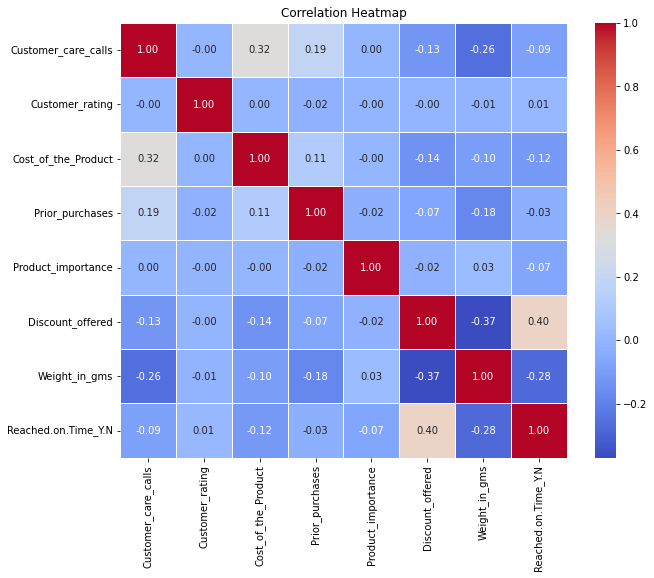

In [6]:
numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()


# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show plot
plt.title('Correlation Heatmap')
plt.show()

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Discount_offered', 'Weight_in_gms']
Customer_care_calls
Median 4.0
Mode 0    4
Name: Customer_care_calls, dtype: int64


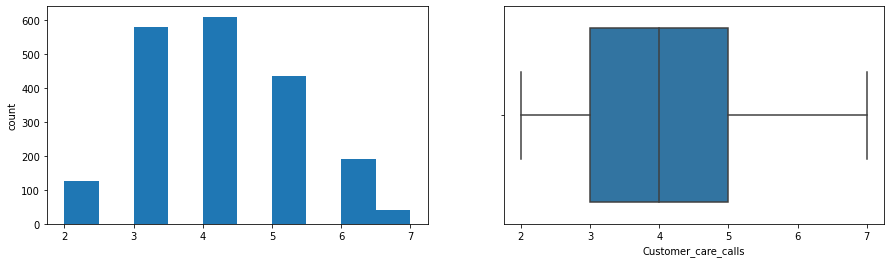

Customer_rating
Median 3.0
Mode 0    2
Name: Customer_rating, dtype: int64


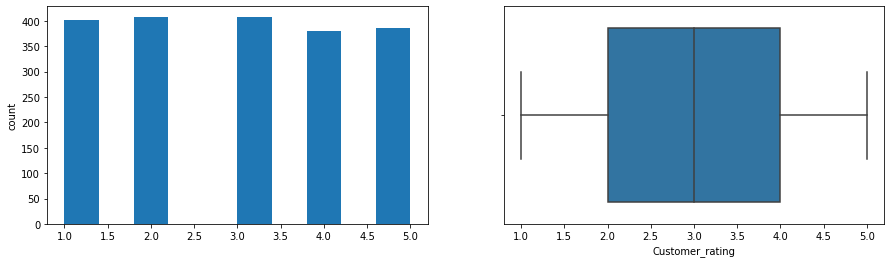

Cost_of_the_Product
Median 215.0
Mode 0    248
Name: Cost_of_the_Product, dtype: int64


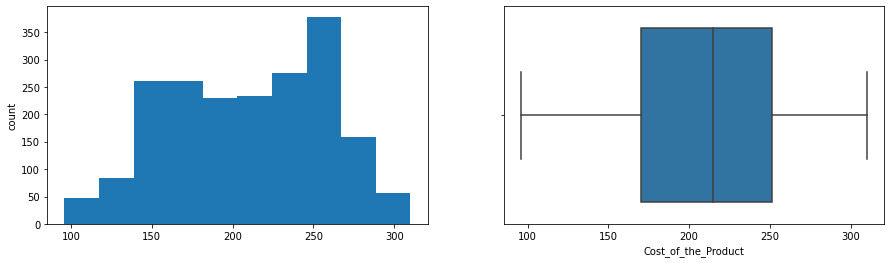

Prior_purchases
Median 3.0
Mode 0    3
Name: Prior_purchases, dtype: int64


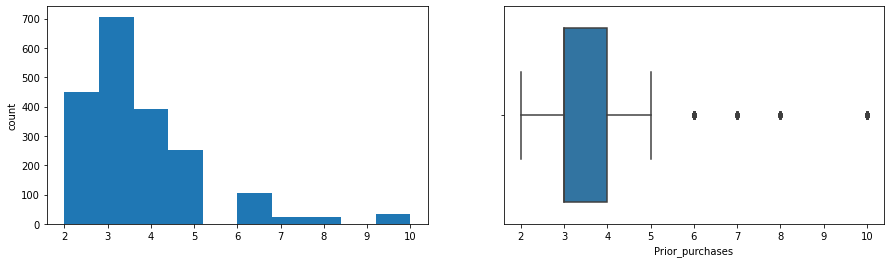

Product_importance
Median 1.0
Mode 0    1
Name: Product_importance, dtype: int32


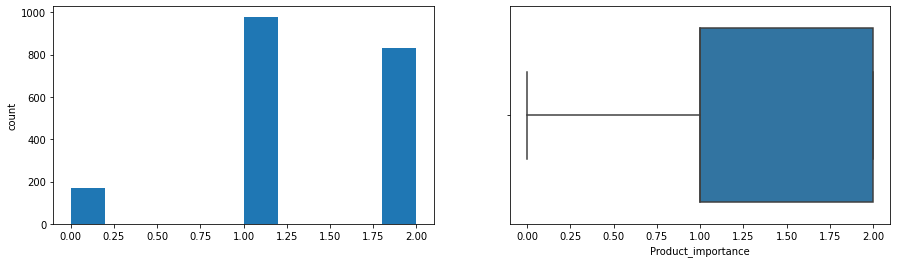

Discount_offered
Median 7.0
Mode 0    1
1    5
Name: Discount_offered, dtype: int64


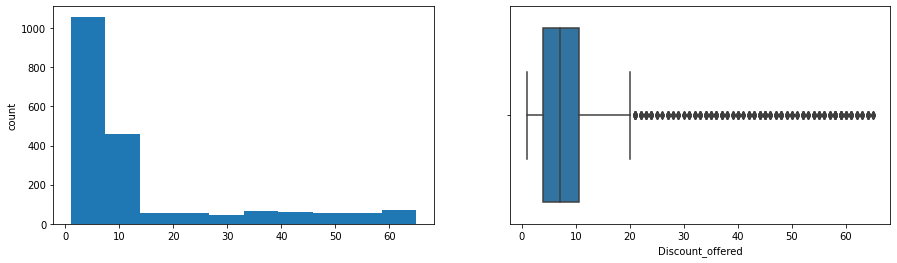

Weight_in_gms
Median 4070.0
Mode 0    1066.0
1    4883.0
Name: Weight_in_gms, dtype: float64


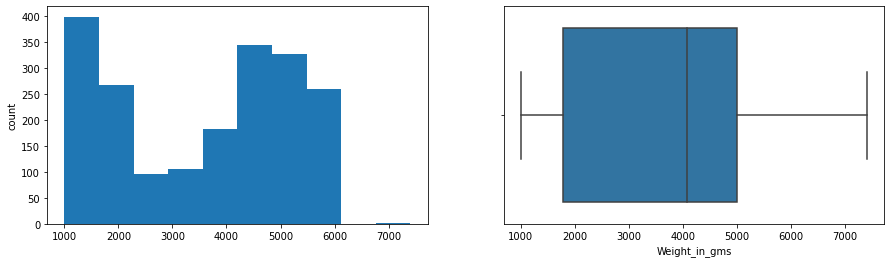

In [7]:
#CATEGORICAL AND NUMERIC COLUMNS

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
num_cols.remove('Reached.on.Time_Y.N')
print(num_cols)
#UNIVARIATE NUMERIC ANALYSIS


for col in num_cols:

    print(col)
    print("Median",df[col].median())
    print("Mode",df[col].mode())
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Splitting data into features (X) and target (y)
X = df.drop(columns=['Reached.on.Time_Y.N'])  # Features
y = df['Reached.on.Time_Y.N']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [10]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"GaussianNB Accuracy of our model is: {accuracy_gnb:.2f}")

GaussianNB Accuracy of our model is: 0.70


In [11]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"MultinomialNB Accuracy of our mdoel is: {accuracy_mnb:.2f}")

MultinomialNB Accuracy of our mdoel is: 0.62


In [12]:
print(confusion_matrix(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_mnb))

[[147   3]
 [116 131]]
[[  0 150]
 [  0 247]]


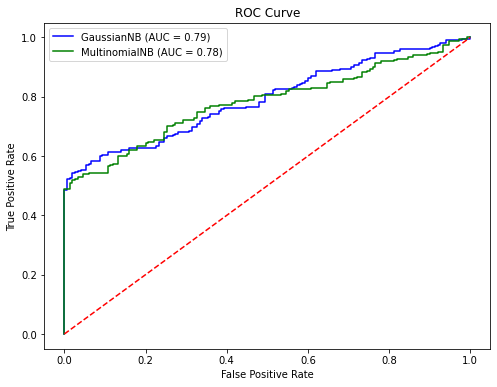

In [16]:

y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
 
y_prob_mnb = mnb.predict_proba(X_test)[:, 1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_mnb, tpr_mnb, color='green', label=f'MultinomialNB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Both models have similar performance, as indicated by their close AUC values (0.79 vs. 0.78) with gaussianNB performing slithgly better